In [1]:
import os
os.chdir(r'C:\Users\MANI\Desktop\Global_Superstore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel(r"C:\Users\MANI\Desktop\Global_Superstore\Global_Superstore2.xlsx")

In [3]:
df.shape

(51290, 24)

In [5]:
df.isna().sum()

Row ID                0
Order ID              0
Order Date            0
Ship Date             0
Ship Mode             0
Customer ID           0
Customer Name         0
Segment               0
City                  0
State                 0
Country               0
Postal Code       41296
Market                0
Region                0
Product ID            0
Category              0
Sub-Category          0
Product Name          0
Sales                 0
Quantity              0
Discount              0
Profit                0
Shipping Cost         0
Order Priority        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Postal Code     9994 non-null   float64
 12  Market          51290 non-null  object 
 13  Region          51290 non-null  object 
 14  Product ID      51290 non-null  object 
 15  Category        51290 non-null  object 
 16  Sub-Category    51290 non-null  object 
 17  Product Name    51290 non-null 

In [5]:
df1 = df.copy()

In [6]:
df['Order ID'].nunique()

25035

In [7]:
df1 = df1.drop(columns='Row ID')

In [8]:
df1['Order Date'] = pd.to_datetime(df1['Order Date'])
df1['Ship Date'] = pd.to_datetime(df1['Ship Date'])

C:\Users\MANI\AppData\Local\Temp\ipykernel_2928\375576762.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['Order Date'] = pd.to_datetime(df1['Order Date'])
C:\Users\MANI\AppData\Local\Temp\ipykernel_2928\375576762.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df1['Ship Date'] = pd.to_datetime(df1['Ship Date'])


In [9]:
df1['Shipping Time'] = (df1['Ship Date']-df1['Order Date']).dt.days

In [10]:
df1['Shipping Time'].unique()

array([0, 2, 1, 3, 4, 7, 6, 5], dtype=int64)

In [11]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  object        
 4   Customer ID     51290 non-null  object        
 5   Customer Name   51290 non-null  object        
 6   Segment         51290 non-null  object        
 7   City            51290 non-null  object        
 8   State           51290 non-null  object        
 9   Country         51290 non-null  object        
 10  Postal Code     9994 non-null   float64       
 11  Market          51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Product ID      51290 non-null  object        
 14  Category        51290 non-null  object        
 15  Su

In [12]:
df1['Customer ID'].nunique()

1590

In [13]:
df1['Customer Name'].nunique()

795

In [14]:
df1[df1['Customer Name'] == 'Rick Hansen']['Customer ID'].unique()

array(['RH-19495', 'RH-9495'], dtype=object)

In [15]:
df1[df1['Customer Name'] == 'Justin Ritter']['Customer ID'].unique()

array(['JR-16210', 'JR-6210'], dtype=object)

In [16]:
df1 = df1.drop(columns=['Customer ID'])

In [17]:
df1['Product Name'].unique()

array(['Plantronics CS510 - Over-the-Head monaural Wireless Headset System',
       'Novimex Executive Leather Armchair, Black',
       'Nokia Smart Phone, with Caller ID', ...,
       'Kleencut Forged Office Shears by Acme United Corporation',
       'Holmes Visible Mist Ultrasonic Humidifier with 2.3-Gallon Output per Day, Replacement Filter',
       'Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac'],
      dtype=object)

In [18]:
df1.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer Name',
       'Segment', 'City', 'State', 'Country', 'Postal Code', 'Market',
       'Region', 'Product ID', 'Category', 'Sub-Category', 'Product Name',
       'Sales', 'Quantity', 'Discount', 'Profit', 'Shipping Cost',
       'Order Priority', 'Shipping Time'],
      dtype='object')

In [19]:
df2 = df1.groupby('Product Name')['Product ID'].count().reset_index()

In [20]:
df2[df2['Product ID'] > 1].head()

,Product Name,Product ID
0,"""While you Were Out"" Message Book, One Form pe...",3
1,"#10 Gummed Flap White Envelopes, 100/Box",4
2,#10 Self-Seal White Envelopes,4
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",7
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",10


In [21]:
df1[df1['Product Name'] == '#10- 4 1/8" x 9 1/2" Recycled Envelopes']['Product ID'].unique()

array(['OFF-EN-10000781', 'OFF-EN-10000461'], dtype=object)

In [22]:
df1 = df1.drop(columns = 'Product ID')

In [23]:
df1.columns

Index(['Order ID', 'Order Date', 'Ship Date', 'Ship Mode', 'Customer Name',
       'Segment', 'City', 'State', 'Country', 'Postal Code', 'Market',
       'Region', 'Category', 'Sub-Category', 'Product Name', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Shipping Cost', 'Order Priority',
       'Shipping Time'],
      dtype='object')

In [24]:
df1['Shipping Time'].unique()

array([0, 2, 1, 3, 4, 7, 6, 5], dtype=int64)

Finding outliers:

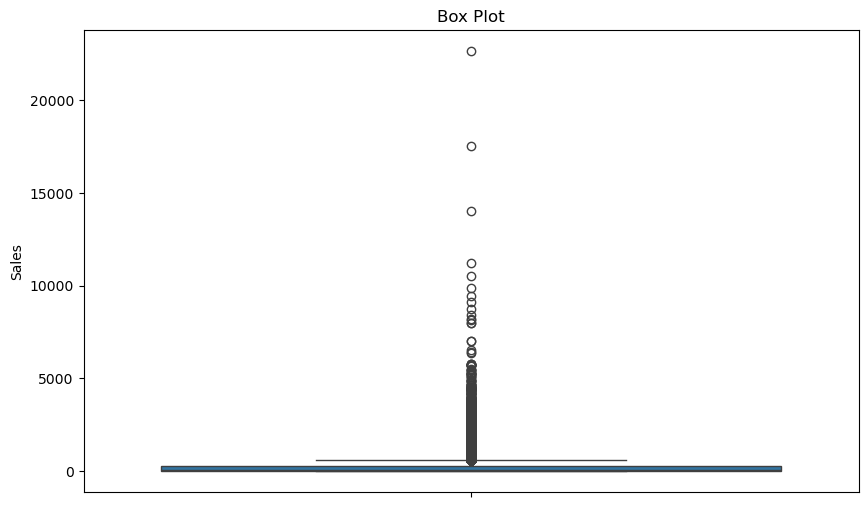

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df1["Sales"])
plt.title("Box Plot")
plt.ylabel("Sales")
plt.show()

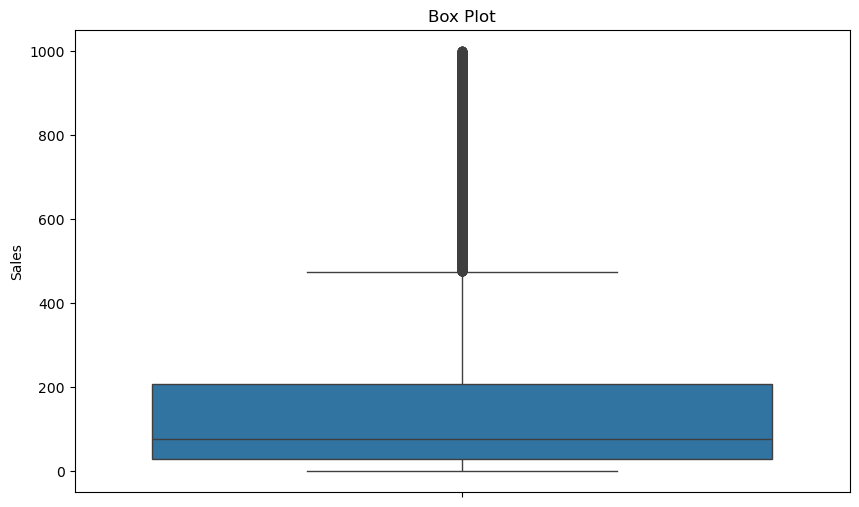

In [26]:
df2 = df1[df1['Sales'] < 1000].copy()
plt.figure(figsize=(10, 6))
sns.boxplot(y=df2["Sales"])
plt.title("Box Plot")
plt.ylabel("Sales")
plt.show()

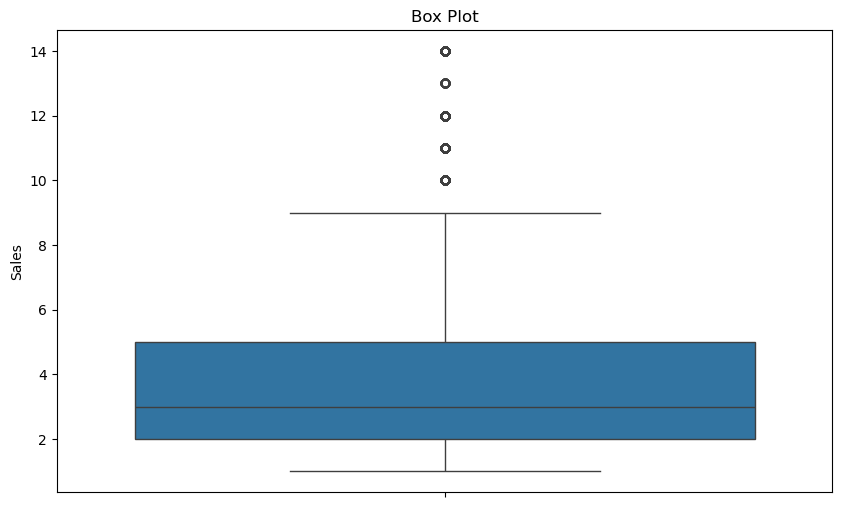

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df1["Quantity"])
plt.title("Box Plot")
plt.ylabel("Sales")
plt.show()

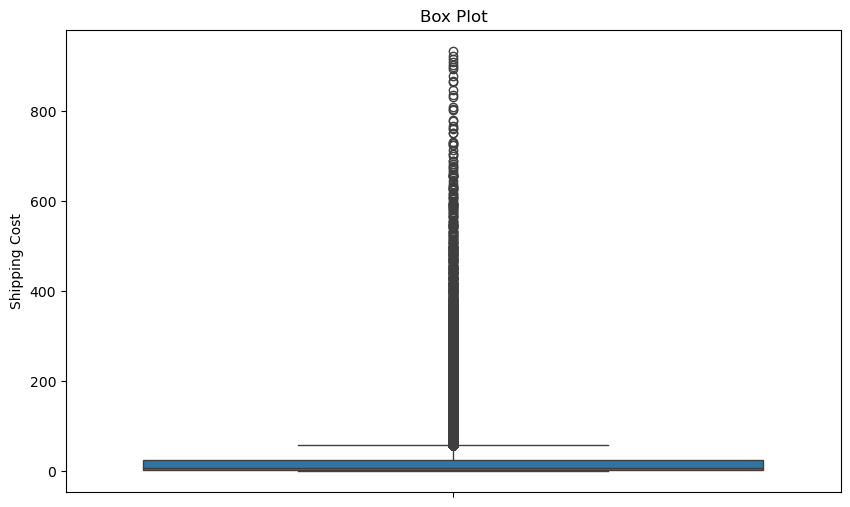

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df1['Shipping Cost'])
plt.title("Box Plot")
plt.ylabel('Shipping Cost')
plt.show()

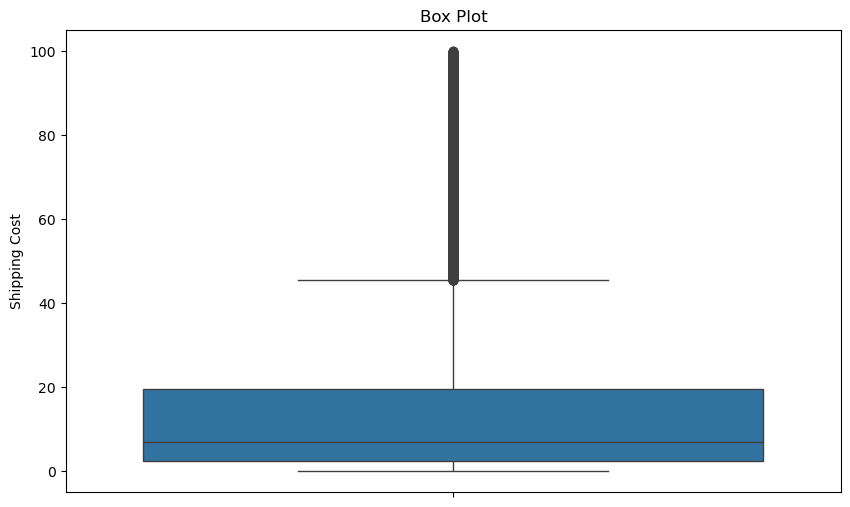

In [29]:
df2 = df1[df1['Shipping Cost'] < 100].copy()
plt.figure(figsize=(10, 6))
sns.boxplot(y=df2['Shipping Cost'])
plt.title("Box Plot")
plt.ylabel('Shipping Cost')
plt.show()

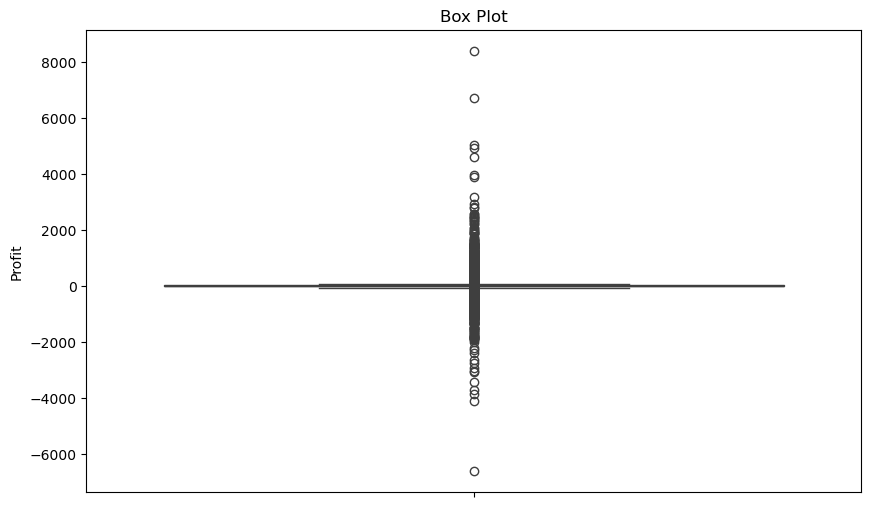

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=df1['Profit'])
plt.title("Box Plot")
plt.ylabel('Profit')
plt.show()

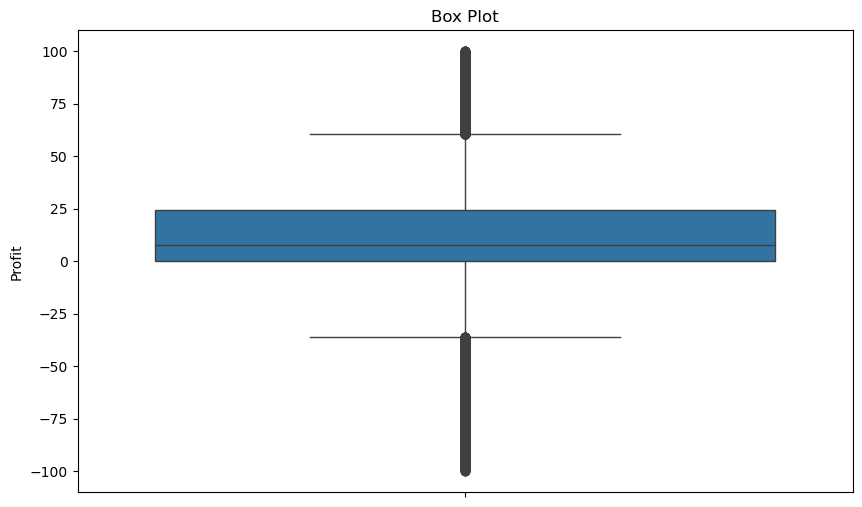

In [31]:
df2 = df1[abs(df1['Profit']) < 100].copy()
plt.figure(figsize=(10, 6))
sns.boxplot(y=df2['Profit'])
plt.title('Box Plot')
plt.ylabel('Profit')
plt.show()

EDA: 

Which country has top sales?

In [32]:
df2 = df1.groupby('Country')['Sales'].sum().reset_index()
df2 = df2.sort_values(by='Sales',ascending=False)
df2.head(5)

,Country,Sales
139,United States,2.297201e+06
6,Australia,9.252359e+05
44,France,8.589311e+05
26,China,7.005620e+05
47,Germany,6.288400e+05


Which are the top 5 profit-making product types on a yearly basis?

In [33]:
df3 = df1.copy()
df3.head(1)

,Order ID,Order Date,Ship Date,Ship Mode,Customer Name,Segment,City,State,Country,Postal Code,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Shipping Time
0,CA-2012-124891,2012-07-31,2012-07-31,Same Day,Rick Hansen,Consumer,New York City,New York,United States,10024.0,...,Technology,Accessories,Plantronics CS510 - Over-the-Head monaural Wir...,2309.65,7,0.0,762.1845,933.57,Critical,0


In [34]:
df3['Year'] = df3['Order Date'].dt.year

In [35]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order ID        51290 non-null  object        
 1   Order Date      51290 non-null  datetime64[ns]
 2   Ship Date       51290 non-null  datetime64[ns]
 3   Ship Mode       51290 non-null  object        
 4   Customer Name   51290 non-null  object        
 5   Segment         51290 non-null  object        
 6   City            51290 non-null  object        
 7   State           51290 non-null  object        
 8   Country         51290 non-null  object        
 9   Postal Code     9994 non-null   float64       
 10  Market          51290 non-null  object        
 11  Region          51290 non-null  object        
 12  Category        51290 non-null  object        
 13  Sub-Category    51290 non-null  object        
 14  Product Name    51290 non-null  object        
 15  Sa

In [36]:
print(df3[df3['Year']==2014].head(5))
print(df3[df3['Year']==2013].head(5))
print(df3[df3['Year']==2012].head(5))
print(df3[df3['Year']==2011].head(5))

           Order ID Order Date  Ship Date       Ship Mode  Customer Name  \
8    CA-2014-135909 2014-10-14 2014-10-21  Standard Class      Jane Waco   
15  ES-2014-5099955 2014-07-31 2014-08-03    Second Class   Ben Peterman   
16   CA-2014-143567 2014-11-03 2014-11-06    Second Class  Thomas Boland   
17  ES-2014-1651774 2014-09-08 2014-09-14  Standard Class  Patrick Jones   
18    IN-2014-11763 2014-01-31 2014-02-01     First Class       Jim Sink   

      Segment        City          State        Country  Postal Code  ...  \
8   Corporate  Sacramento     California  United States      95823.0  ...   
15  Corporate       Paris  Ile-de-France         France          NaN  ...   
16  Corporate   Henderson       Kentucky  United States      42420.0  ...   
17  Corporate       Prato        Tuscany          Italy          NaN  ...   
18  Corporate  Townsville     Queensland      Australia          NaN  ...   

   Sub-Category                                       Product Name     Sales  \


Question: How is the product price varying with sales - Is there any increase in sales with the decrease in price at a day level?

<Figure size 800x400 with 0 Axes>

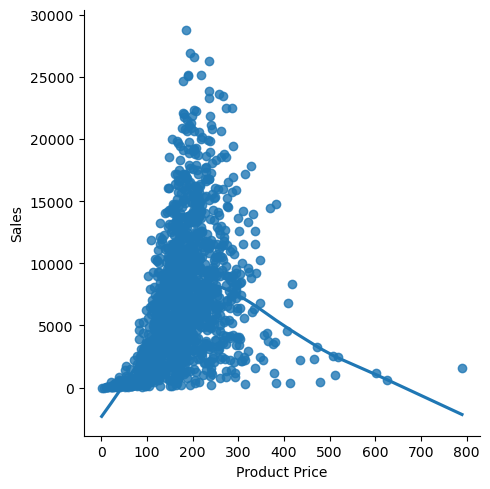

In [41]:
e = df1.copy()
e = e[e['Sales'] < 2000]
e['Product Price'] = e['Sales']*(1-e['Discount'])
e = e.groupby('Order Date').agg({'Sales': 'sum','Product Price': 'mean'}).reset_index()
plt.figure(figsize=(8,4))
sns.lmplot(data=e, x='Product Price', y='Sales',lowess=True)
plt.show()

In [42]:
q_low = e['Product Price'].quantile(0.01)
q_high = e['Product Price'].quantile(0.99)

<Axes: xlabel='log_price', ylabel='log_sales'>

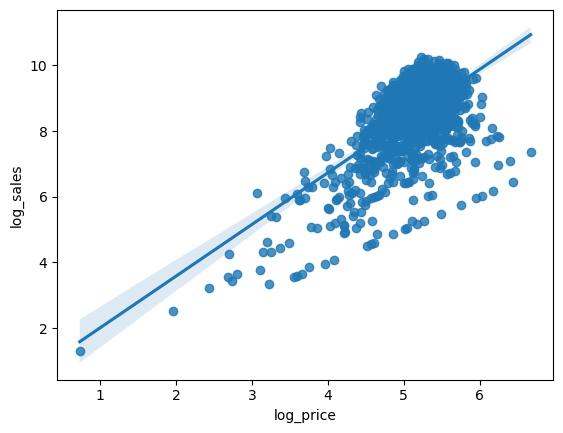

In [45]:
e['log_price'] = np.log1p(e['Product Price'])  # log1p handles 0 safely
e['log_sales'] = np.log1p(e['Sales'])

sns.regplot(data=e, x='log_price', y='log_sales', scatter=True)

Question: Profile the customers based on their frequency of purchase - calculate frequency of purchase for each customer

In [117]:
latest_date = df1["Order Date"].max() + pd.Timedelta(days=1)
print(latest_date)

d1 = df1.groupby("Customer Name").agg({
    "Order Date": lambda x: (latest_date - x.max()).days,  # Recency
    "Order ID": "nunique",  # Frequency
    "Sales": "sum"  # Monetary
}).reset_index()

# Rename columns
d1.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]

# Rank-based Frequency scoring
d1["F_Rank"] = d1["Frequency"].rank(method="first")

# Get bin edges for Recency, Frequency (ranked), and Monetary
_, recency_bins = pd.qcut(d1["Recency"], q=5, labels=[5, 4, 3, 2, 1], retbins=True)
_, frequency_bins = pd.qcut(d1["F_Rank"], q=5, labels=[1, 2, 3, 4, 5], retbins=True)
_, monetary_bins = pd.qcut(d1["Monetary"], q=5, labels=[1, 2, 3, 4, 5], retbins=True)

# Convert frequency rank bins to actual frequency values
actual_freq_bins = []
for i in range(len(frequency_bins) - 1):
    lower_rank = frequency_bins[i]
    upper_rank = frequency_bins[i + 1]
    actual_lower = rfm_df.loc[rfm_df["F_Rank"] >= lower_rank, "Frequency"].min()
    actual_upper = rfm_df.loc[rfm_df["F_Rank"] <= upper_rank, "Frequency"].max()
    actual_freq_bins.append(f"{actual_lower} - {actual_upper}")

# Create a DataFrame with readable bin ranges
rfm_bin_ranges1 = pd.DataFrame({
    "Score": [1,2,3,4,5],
    "Frequency Range (Mapped)": actual_freq_bins,
    "Monetary Range": [f"{int(monetary_bins[i])} - {int(monetary_bins[i+1])}" for i in range(len(monetary_bins)-1)]
})
rfm_bin_ranges2 = pd.DataFrame({
    "Score": [5,4,3,2,1],
    "Recency Range": [f"{int(recency_bins[i])} - {int(recency_bins[i+1])}" for i in range(len(recency_bins)-1)]
})

# Display bin ranges
print(rfm_bin_ranges1)
print(rfm_bin_ranges2)

2015-01-01 00:00:00
   Score Frequency Range (Mapped) Monetary Range
0      1                  15 - 28   3892 - 11547
1      2                  28 - 31  11547 - 13946
2      3                  31 - 34  13946 - 16380
3      4                  34 - 37  16380 - 19930
4      5                  37 - 47  19930 - 40488
   Score Recency Range
0      5         1 - 6
1      4        6 - 13
2      3       13 - 23
3      2       23 - 37
4      1      37 - 429


In [118]:
# Recency Score (lower is better, so reverse the labels)
d1["R_Score"] = pd.qcut(d1["Recency"], q=5, labels=[5, 4, 3, 2, 1])

# Frequency Score (higher is better)
d1["F_Score"] = pd.qcut(d1["Frequency"].rank(method="first"), q=5, labels=[1, 2, 3, 4, 5])

# Monetary Score (higher is better)
d1["M_Score"] = pd.qcut(d1["Monetary"], q=5, labels=[1, 2, 3, 4, 5])

d1.head()

,CustomerID,Recency,Frequency,Monetary,F_Rank,R_Score,F_Score,M_Score
0,Aaron Bergman,17,37,24644.62750,615.0,3,4,5
1,Aaron Hawkins,13,34,20759.51384,469.0,4,3,5
2,Aaron Smayling,24,31,14212.62840,312.0,2,2,3
3,Adam Bellavance,36,41,20186.77840,737.0,2,5,5
4,Adam Hart,3,42,21718.20142,756.0,5,5,5


In [119]:
d1["R_Score"] = d1["R_Score"].astype(int)
d1["F_Score"] = d1["F_Score"].astype(int)
d1["M_Score"] = d1["M_Score"].astype(int)
def rfm_segment(row):
    if row["R_Score"] == 5 and row["F_Score"] == 5: 
        return "High Value"   
    if row["R_Score"] >= 4 and row["F_Score"] >= 4: 
        return "Loyal"
    elif row["R_Score"] >= 2 or row["F_Score"] >= 2: 
        return "At-Risk"
    else:
        return "Dormant"

d1["Segment"] = d1.apply(rfm_segment, axis=1)
d1["Segment"].value_counts()

Segment
At-Risk       602
Loyal         104
High Value     45
Dormant        44
Name: count, dtype: int64

Question: Do the high value customers contribute more revenue

In [120]:
b = df1.groupby('Customer Name')['Sales'].sum().reset_index()
d1['Sales'] = b.iloc[:,1]
d1.head()

,CustomerID,Recency,Frequency,Monetary,F_Rank,R_Score,F_Score,M_Score,Segment,Sales
0,Aaron Bergman,17,37,24644.62750,615.0,3,4,5,At-Risk,24644.62750
1,Aaron Hawkins,13,34,20759.51384,469.0,4,3,5,At-Risk,20759.51384
2,Aaron Smayling,24,31,14212.62840,312.0,2,2,3,At-Risk,14212.62840
3,Adam Bellavance,36,41,20186.77840,737.0,2,5,5,At-Risk,20186.77840
4,Adam Hart,3,42,21718.20142,756.0,5,5,5,High Value,21718.20142


In [121]:
d2 = d1.groupby('Segment')['Sales'].sum().reset_index()
d2.head(4)

,Segment,Sales
0,At-Risk,9.308339e+06
1,Dormant,5.366046e+05
2,High Value,9.136679e+05
3,Loyal,1.883890e+06


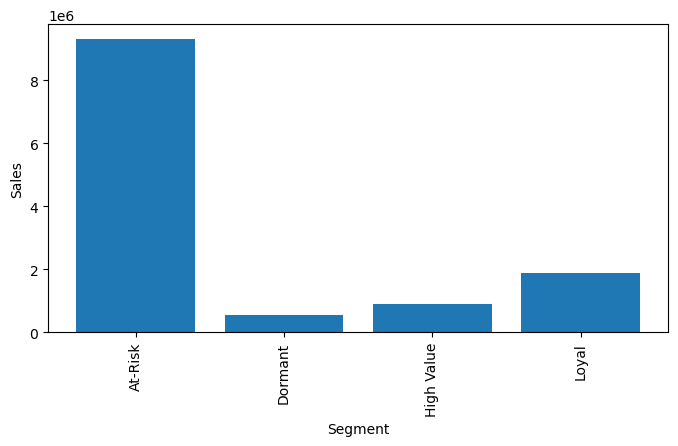

In [122]:
plt.figure(figsize=(8,4))
plt.bar(d2['Segment'],d2['Sales'])
plt.xticks(rotation=90)
plt.xlabel('Segment')
plt.ylabel('Sales')
plt.show()

Are they also profitable - what is the profit margin across the buckets

In [124]:
d1['Profit'] = df1.groupby('Customer Name')['Profit'].sum().values
d1.head()

,CustomerID,Recency,Frequency,Monetary,F_Rank,R_Score,F_Score,M_Score,Segment,Sales,Profit
0,Aaron Bergman,17,37,24644.62750,615.0,3,4,5,At-Risk,24644.62750,4683.20800
1,Aaron Hawkins,13,34,20759.51384,469.0,4,3,5,At-Risk,20759.51384,2450.92904
2,Aaron Smayling,24,31,14212.62840,312.0,2,2,3,At-Risk,14212.62840,369.16180
3,Adam Bellavance,36,41,20186.77840,737.0,2,5,5,At-Risk,20186.77840,4979.97690
4,Adam Hart,3,42,21718.20142,756.0,5,5,5,High Value,21718.20142,1902.03342


In [125]:
d3 = d1.groupby('Segment')['Profit'].sum().reset_index()
d3.head(4)

,Segment,Profit
0,At-Risk,1.089771e+06
1,Dormant,5.718291e+04
2,High Value,1.113477e+05
3,Loyal,2.091559e+05


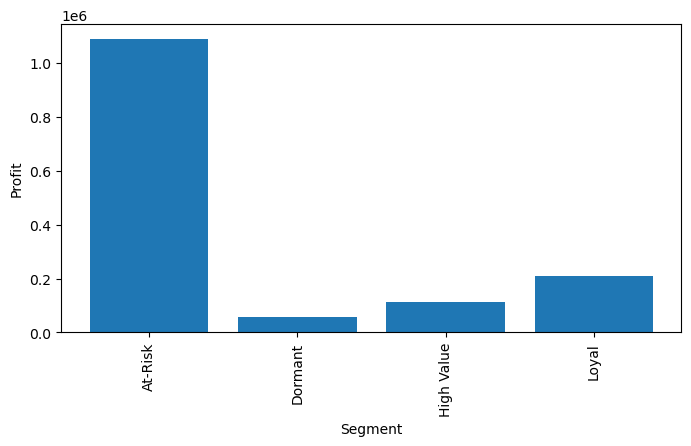

In [126]:
plt.figure(figsize=(8,4))
plt.bar(d3['Segment'],d3['Profit'])
plt.xticks(rotation=90)
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.show()

Which customer segment is most profitable in each year?

In [127]:
d1['S'] = d1['Segment'].copy()
d1 = d1.drop(columns='Segment')
d1.head()

,CustomerID,Recency,Frequency,Monetary,F_Rank,R_Score,F_Score,M_Score,Sales,Profit,S
0,Aaron Bergman,17,37,24644.62750,615.0,3,4,5,24644.62750,4683.20800,At-Risk
1,Aaron Hawkins,13,34,20759.51384,469.0,4,3,5,20759.51384,2450.92904,At-Risk
2,Aaron Smayling,24,31,14212.62840,312.0,2,2,3,14212.62840,369.16180,At-Risk
3,Adam Bellavance,36,41,20186.77840,737.0,2,5,5,20186.77840,4979.97690,At-Risk
4,Adam Hart,3,42,21718.20142,756.0,5,5,5,21718.20142,1902.03342,High Value


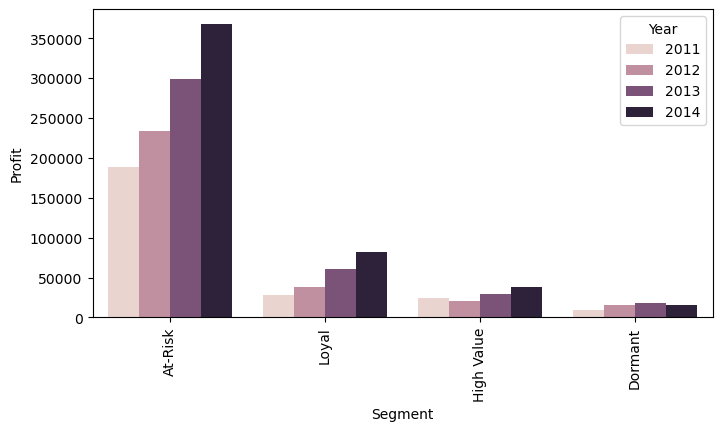

In [136]:
df1['Year'] = df1['Order Date'].dt.year
d1.columns = ['Customer Name', 'Recency', 'Frequency', 'Monetary', 'F_Rank', 'R_Score',
       'F_Score', 'M_Score', 'Sales', 'Profit', 'S']
d6 = df1.merge(d1.iloc[:,[0,10]],on='Customer Name',how='inner')
d6 = d6.groupby(['Year','S'])['Profit'].sum().reset_index()
d6 = d6.sort_values(by=['Year','Profit'],ascending=False)
plt.figure(figsize=(8,4))
sns.barplot(x='S', y='Profit', data=d6, hue= 'Year')
plt.xticks(rotation=90)
plt.xlabel('Segment')
plt.ylabel('Profit')
plt.show()

Ques: How the customers are distributed across the countries?

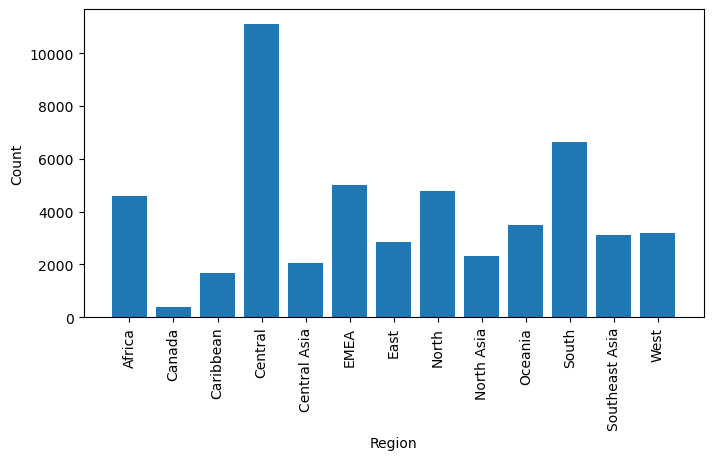

In [58]:
h = df1.groupby('Region')['Customer Name'].count().reset_index()
plt.figure(figsize=(8,4))
plt.bar(h['Region'],h['Customer Name'])
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.xlabel('Region')
plt.show()

Identify High/Low Performing Regions, Categories & Segments

In [59]:
a2 = df1.groupby('Region')[['Sales','Profit']].sum().reset_index()
a2.head()

,Region,Sales,Profit
0,Africa,7.837732e+05,88871.63100
1,Canada,6.692817e+04,17817.39000
2,Caribbean,3.242809e+05,34571.32104
3,Central,2.822303e+06,311403.98164
4,Central Asia,7.528266e+05,132480.18700


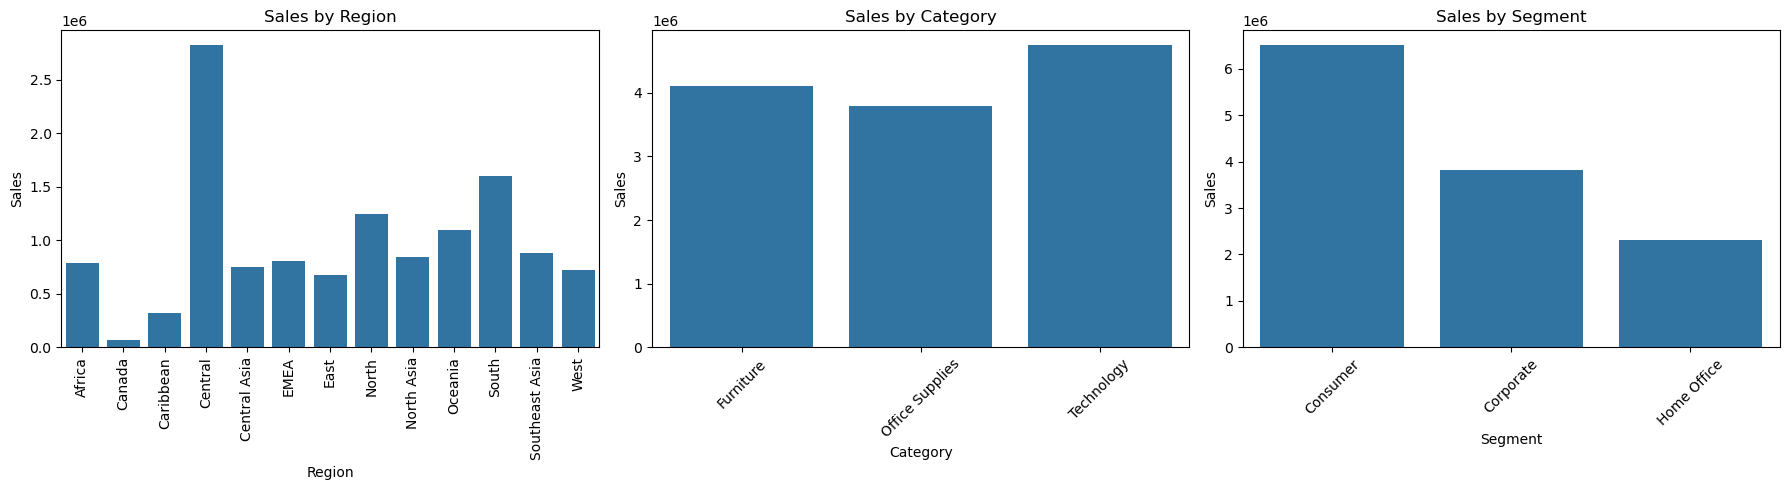

In [60]:
a3 = df1.groupby('Category')[['Sales','Profit']].sum().reset_index()
a4 = df1.groupby('Segment')[['Sales','Profit']].sum().reset_index()
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(x=a2['Region'], y=a2['Sales'])
plt.title("Sales by Region")
plt.xticks(rotation=90)

plt.subplot(1,3,2)
sns.barplot(x=a3['Category'], y=a3['Sales'])
plt.title("Sales by Category")
plt.xticks(rotation=45)

plt.subplot(1,3,3)
sns.barplot(x=a4['Segment'], y=a4['Sales'])
plt.title("Sales by Segment")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Track Shipping Performance and Delivery Delays

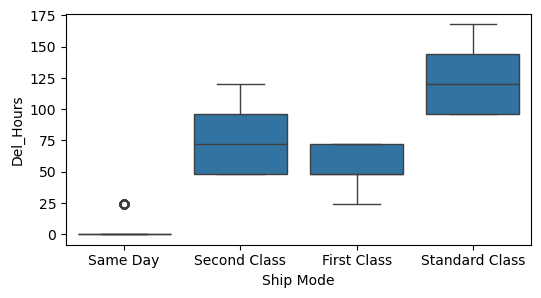

In [80]:
df1['Del_Hours'] = (df1['Ship Date']-df1['Order Date']).dt.total_seconds()/3600
plt.figure(figsize=(6,3))
sns.boxplot(data=df1, x='Ship Mode', y='Del_Hours')
plt.show()

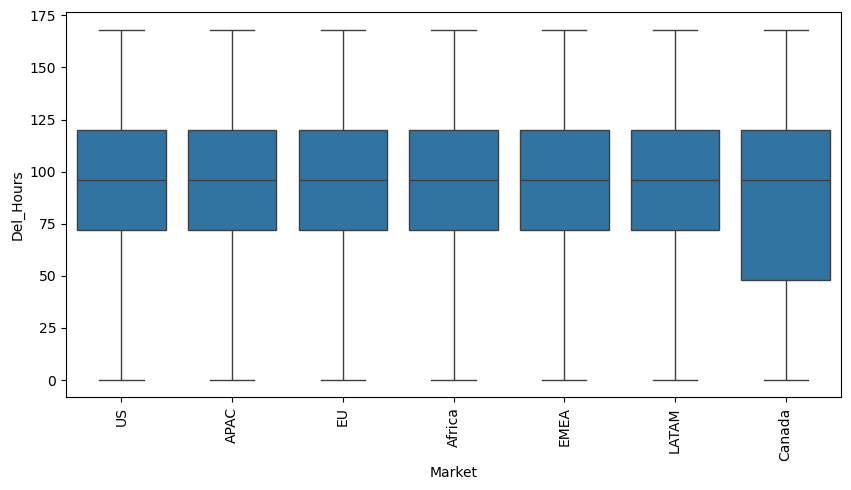

In [114]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df1, x='Market', y='Del_Hours')
plt.xticks(rotation=90)
plt.show()

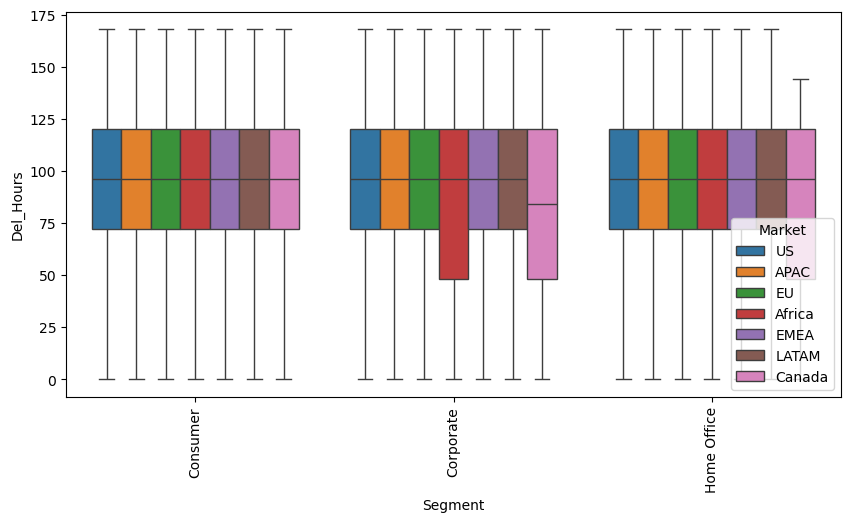

In [78]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df1, x='Segment', y='Del_Hours',hue='Market')
plt.xticks(rotation=90)
plt.show()

In [108]:
sample_df=df1.groupby('Year')[['Sales','Profit']].agg({'Sales':'sum','Profit':'sum'}).reset_index()
sample_df['Sales Growth%']=sample_df['Sales'].pct_change()
sample_df['Profit Growth%']=sample_df['Profit'].pct_change()

sample_df.head()

,Year,Sales,Profit,Sales Growth%,Profit Growth%
0,2011,2.259451e+06,248940.81154,NaN,NaN
1,2012,2.677439e+06,307415.27910,0.184995,0.234893
2,2013,3.405746e+06,406935.23018,0.272017,0.323731
3,2014,4.299866e+06,504165.97046,0.262533,0.238934


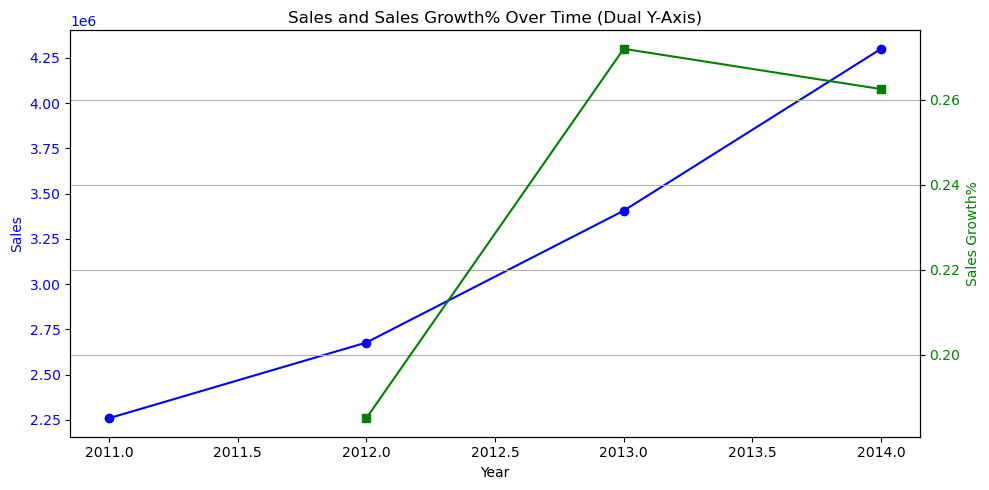

In [111]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(sample_df['Year'], sample_df['Sales'], color='blue', marker='o', label='Sales')
ax1.set_xlabel('Year')
ax1.set_ylabel('Sales', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(sample_df['Year'], sample_df['Sales Growth%'], color='green', marker='s', label='Sales Growth%')
ax2.set_ylabel('Sales Growth%', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Sales and Sales Growth% Over Time (Dual Y-Axis)')
plt.grid(True)
plt.tight_layout()
plt.show()

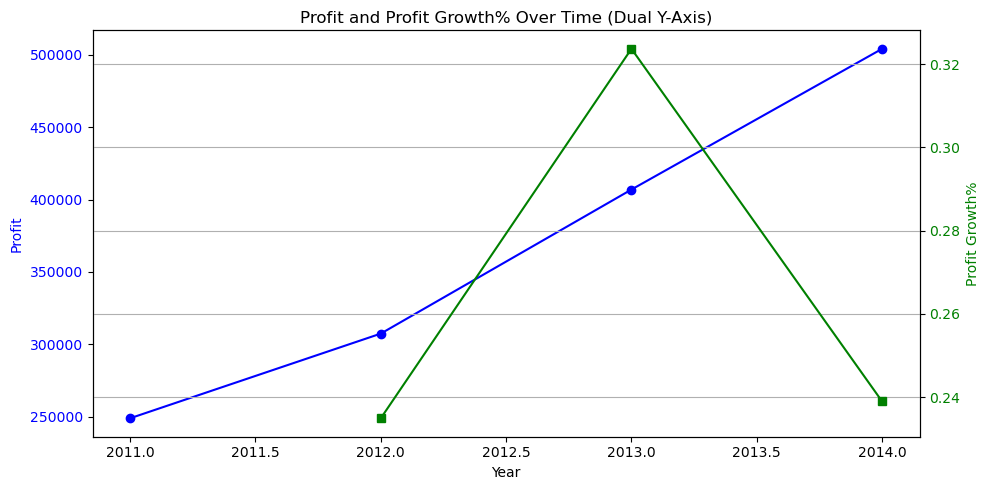

In [112]:
fig, ax1 = plt.subplots(figsize=(10, 5))
ax1.plot(sample_df['Year'], sample_df['Profit'], color='blue', marker='o', label='Profit')
ax1.set_xlabel('Year')
ax1.set_ylabel('Profit', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(sample_df['Year'], sample_df['Profit Growth%'], color='green', marker='s', label='Profit Growth%')
ax2.set_ylabel('Profit Growth%', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Profit and Profit Growth% Over Time (Dual Y-Axis)')
plt.grid(True)
plt.tight_layout()
plt.show()